In [3]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [114]:
# Load GRL2016 data
infil = np.loadtxt('/home/bmoorema/Desktop/grl2016.raw')
crid = infil[:,0]
stn = infil[:,3]
mnth = infil[:,4]
day = infil[:,5]
S = infil[:,10]
alk = infil[:,15]
alk_qf = infil[:,16]

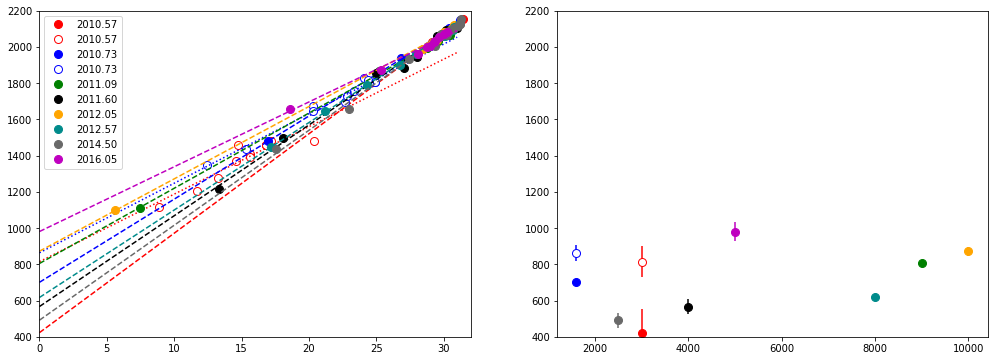

In [131]:
flows = [3000, 3000, 1600, 1600, 9000, 4000, 10000, 8000, 2500, 5000]
cruises = [2010.57, 2010.57, 2010.73, 2010.73, 2011.09, 2011.60, 2012.05, 2012.57, 2014.50, 2016.05]
stations = [39.5, 0.5, 39.5, 0.5, 42., 39.5, 42., 39.5, 42., 42.]
colors = ['r', 'red', 'b', 'blue', 'g', 'k', 'orange', 'darkcyan', 'dimgray', 'm']
endmembers = {}

fig, ax = plt.subplots(1, 2, figsize=(17, 6))
for cruise, station, color, flow in zip(cruises, stations, colors, flows):
    if color is 'red' or color is 'blue':
        facecolor = 'w'
        linestyle = ':'
    else:
        facecolor = color
        linestyle = '--'
    index = (crid == cruise) & (stn == station) & ((alk_qf == 2) | (alk_qf == 6))
    p, V = np.polyfit(S[index], alk[index], 1, cov=True)
    endmembers[cruise] = [p[1], np.sqrt(V[1][1])]
    ax[0].plot(S[index], alk[index], 'o', color=color, markersize=8, markerfacecolor=facecolor, label=f'{cruise:.2f}')
    ax[0].plot(np.arange(32), np.arange(32)*p[0] + p[1], linestyle=linestyle, color=color)
    ax[0].set_xlim([0, 32])
    ax[0].set_ylim([400, 2200])
    
    ax[1].plot(flow, p[1], 'o', color=color, markersize=8, markerfacecolor=facecolor)
    ax[1].errorbar(flow, p[1], np.sqrt(V[1][1]), color=color)
    ax[1].set_ylim([400, 2200])

ax[0].legend()